In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MiniBatchKMeans, DBSCAN

import os

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Fraud Detection/ex_fraud.csv')
df

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.8,0.867333,-1,84,30,0.013007,24.609693,AA,3761,...,1,200,0,INTERNET,3.039029,other,1,1,0,2
1,0,0.9,0.702213,-1,33,20,20.398596,-1.115973,AD,592,...,0,200,0,INTERNET,7.900161,linux,0,1,0,2
2,0,0.8,0.070854,-1,160,30,0.019530,41.385962,AA,1712,...,1,200,0,INTERNET,3.657091,linux,0,1,0,2
3,0,0.8,0.242005,-1,78,50,0.383555,-0.961412,AC,799,...,0,200,0,INTERNET,9.934541,linux,1,1,0,2
4,0,0.6,0.393752,103,2,50,0.006928,-0.857291,AC,516,...,0,200,0,INTERNET,13.119910,other,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,1,0.1,0.227353,-1,108,50,16.676314,-0.827929,AC,1150,...,0,200,0,INTERNET,15.065391,macintosh,0,1,0,4
5004,1,0.6,0.286382,-1,59,40,0.018467,-1.533127,AC,3723,...,0,200,0,INTERNET,7.143914,windows,1,1,0,4
5005,1,0.9,0.267668,-1,231,40,2.194812,-0.818222,AC,2073,...,0,2000,1,INTERNET,3.626882,windows,0,1,0,4
5006,1,0.9,0.473510,-1,148,30,0.002501,-1.086355,AC,1437,...,0,1500,0,INTERNET,4.564306,other,1,1,0,4


In [3]:
columns_data=df.columns.values.tolist()
columns_data

['fraud_bool',
 'income',
 'name_email_similarity',
 'prev_address_months_count',
 'current_address_months_count',
 'customer_age',
 'days_since_request',
 'intended_balcon_amount',
 'payment_type',
 'zip_count_4w',
 'velocity_6h',
 'velocity_24h',
 'velocity_4w',
 'bank_branch_count_8w',
 'date_of_birth_distinct_emails_4w',
 'employment_status',
 'credit_risk_score',
 'email_is_free',
 'housing_status',
 'phone_home_valid',
 'phone_mobile_valid',
 'bank_months_count',
 'has_other_cards',
 'proposed_credit_limit',
 'foreign_request',
 'source',
 'session_length_in_minutes',
 'device_os',
 'keep_alive_session',
 'device_distinct_emails_8w',
 'device_fraud_count',
 'month']

In [4]:
df.dropna(inplace = True)
df

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.8,0.867333,-1,84,30,0.013007,24.609693,AA,3761,...,1,200,0,INTERNET,3.039029,other,1,1,0,2
1,0,0.9,0.702213,-1,33,20,20.398596,-1.115973,AD,592,...,0,200,0,INTERNET,7.900161,linux,0,1,0,2
2,0,0.8,0.070854,-1,160,30,0.019530,41.385962,AA,1712,...,1,200,0,INTERNET,3.657091,linux,0,1,0,2
3,0,0.8,0.242005,-1,78,50,0.383555,-0.961412,AC,799,...,0,200,0,INTERNET,9.934541,linux,1,1,0,2
4,0,0.6,0.393752,103,2,50,0.006928,-0.857291,AC,516,...,0,200,0,INTERNET,13.119910,other,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,1,0.1,0.227353,-1,108,50,16.676314,-0.827929,AC,1150,...,0,200,0,INTERNET,15.065391,macintosh,0,1,0,4
5004,1,0.6,0.286382,-1,59,40,0.018467,-1.533127,AC,3723,...,0,200,0,INTERNET,7.143914,windows,1,1,0,4
5005,1,0.9,0.267668,-1,231,40,2.194812,-0.818222,AC,2073,...,0,2000,1,INTERNET,3.626882,windows,0,1,0,4
5006,1,0.9,0.473510,-1,148,30,0.002501,-1.086355,AC,1437,...,0,1500,0,INTERNET,4.564306,other,1,1,0,4


In [5]:
##DROP THE VARIABLES THAT MAKE NO SENSE TO USE IN THE MACHINE LEARNING
df.dropna(inplace = True)
df=df.select_dtypes([int, float])
## only select the data type from integer and float

Y= df['fraud_bool']
X = df.drop(['fraud_bool'], axis=1)

X.columns
X.dtypes

income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
credit_risk_score                     int64
email_is_free                         int64
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     int64
has_other_cards                       int64
proposed_credit_limit                 int64
foreign_request                       int64
session_length_in_minutes           float64
keep_alive_session              

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.30,random_state=42)

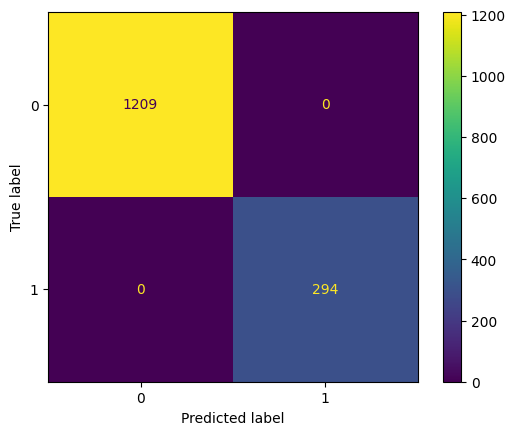

In [7]:
# ML1 - Random Forest classifier
rf = RandomForestClassifier()

# Train the model
rf.fit(xtrain, ytrain)

pred1 = rf.predict(xtest)
# Obtain the ROC score
round(roc_auc_score(ytest,pred1),2)*100

# Create a confusion matrix
cm1 = confusion_matrix(ytest,pred1)
cm1


disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot()
plt.show()

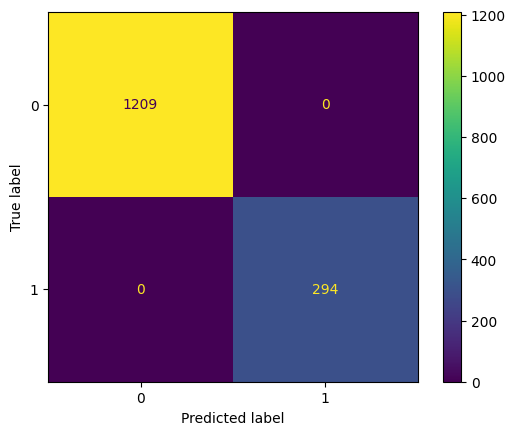

In [8]:
# =============================================================================
# # ML2 - Decision Tree
# =============================================================================
dtc=DecisionTreeClassifier()

dtc.fit(xtrain, ytrain)

pred2 = dtc.predict(xtest)

# Obtain the ROC score
round(roc_auc_score(ytest,pred2),2)*100

# Create a confusion matrix
cm2 = confusion_matrix(ytest,pred2)
cm2

disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()
plt.show()

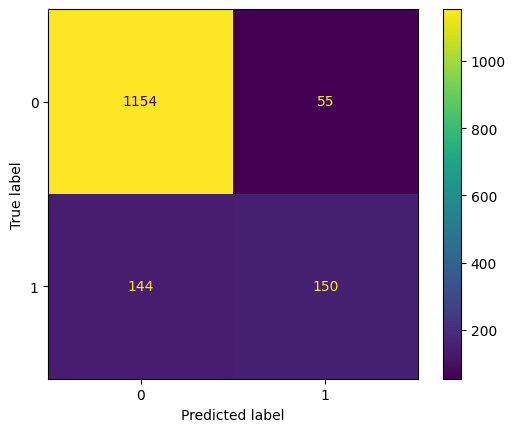

In [9]:
# =============================================================================
# # ML3 - Decision Tree
# =============================================================================
knn=KNeighborsClassifier()

knn.fit(xtrain, ytrain)

pred3 = knn.predict(xtest)

# Obtain the ROC score
round(roc_auc_score(ytest,pred3),2)*100

# Create a confusion matrix
cm3 = confusion_matrix(ytest,pred3)
cm3

disp = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp.plot()
plt.show()

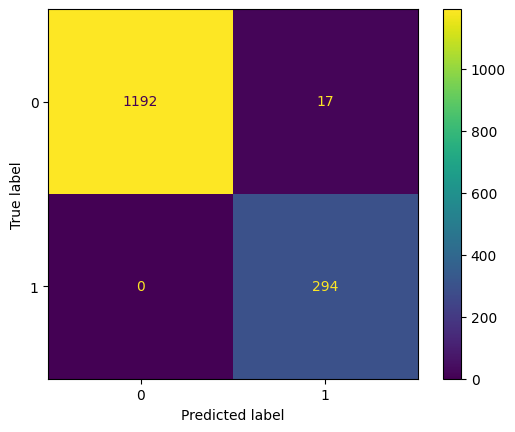

In [10]:
# =============================================================================
# ####ML4 - GAUSSIAN NAIVE BAYES
# =============================================================================
gnb=GaussianNB()

gnb.fit(xtrain, ytrain)

pred4 = gnb.predict(xtest)

# Obtain the ROC score
round(roc_auc_score(ytest,pred4),2)*100

# Create a confusion matrix
cm4 = confusion_matrix(ytest,pred4)
cm4

disp = ConfusionMatrixDisplay(confusion_matrix=cm4)
disp.plot()
plt.show()

In [11]:
###COMPARING THE MODELS IN TERMS OF ACCURACY
print(f'Accuracy Score_Ml1:\n{accuracy_score(ytest, pred1):0.3f}')
print(f'Accuracy Score_Ml2:\n{accuracy_score(ytest, pred2):0.3f}')
print(f'Accuracy Score_ML3:\n{accuracy_score(ytest, pred3):0.3f}')
print(f'Accuracy Score_ML4:\n{accuracy_score(ytest, pred4):0.3f}')

Accuracy Score_Ml1:
1.000
Accuracy Score_Ml2:
1.000
Accuracy Score_ML3:
0.868
Accuracy Score_ML4:
0.989
